# LNM Group 1 - Prashant Kulkarni, Dharti Seagraves, Steve Veldman
## Final Project: Bank Account Fraud Detection
## Winter 2024

# Import Libraries and Data:

In [2]:
import time
# import beepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import scipy
from scipy.cluster import hierarchy
from scipy.stats import pearsonr
import statsmodels.api as sm
# import shap
# import swifter



In [3]:

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/LNM Final - Winter 2024/Base.csv', low_memory=False)
# df = pd.read_csv('/content/Base.csv', low_memory=False)

Mounted at /content/drive


In [ ]:
df.head(20)
### Note: -1 means a missing value/null for many of the variables; we will need to figure out how to handle these

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0
5,0,0.6,0.294840,-1,369,30,0.024232,-1.232556,AD,1204,...,0,200.0,0,INTERNET,6.987316,linux,1,1,0,0
6,0,0.2,0.773085,22,4,40,0.006919,-0.544676,AB,1998,...,0,200.0,0,INTERNET,28.199923,x11,1,1,0,0
7,0,0.8,0.153880,-1,103,40,0.045122,-1.101184,AB,1548,...,1,200.0,0,INTERNET,11.234264,other,1,1,0,0
8,0,0.3,0.523655,21,2,30,0.035206,-0.955737,AB,1781,...,0,200.0,0,INTERNET,5.329387,other,1,1,0,0
9,0,0.8,0.834475,-1,134,20,0.017245,-1.356393,AD,3113,...,0,1500.0,0,INTERNET,4.103970,other,1,1,0,0


In [ ]:
df.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [4]:
# df.drop_duplicates()
df.groupby(['fraud_bool'])['fraud_bool'].count()

fraud_bool
0    988971
1     11029
Name: fraud_bool, dtype: int64

# EDA:

<ipython-input-5-8597ee94f7f9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_correlation = df.corr()


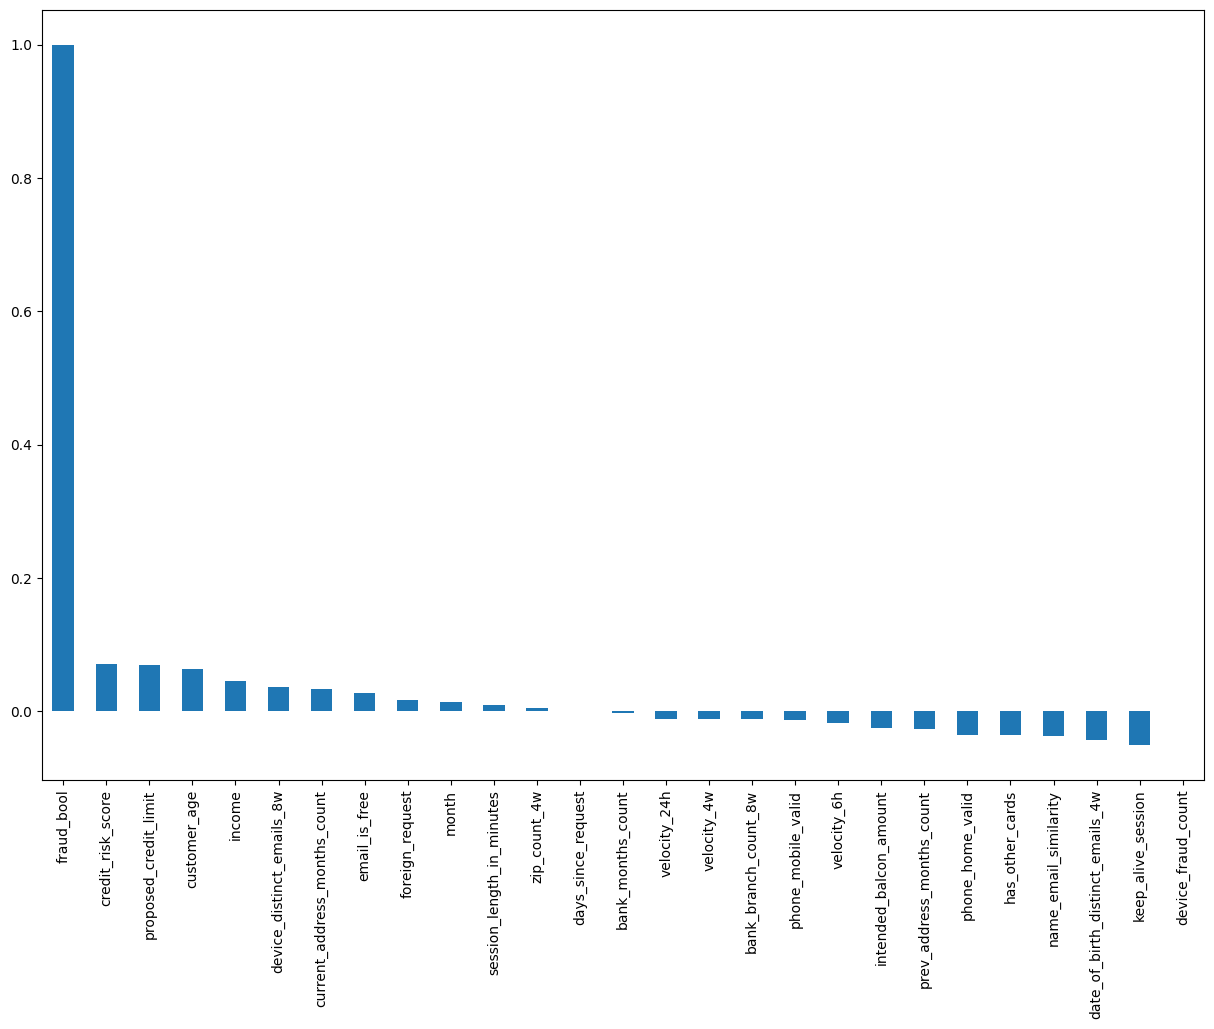

In [5]:
df_correlation = df.corr()

plt.figure(figsize = (15,10))
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
df_correlation['fraud_bool'].sort_values(ascending = False).plot(kind = 'bar')
plt.show()

In [ ]:
# #convert binary to boolean:
# df['fraud_bool'] = df['fraud_bool'].astype('bool')
# df['email_is_free'] = df['email_is_free'].astype('bool')
# df['phone_home_valid'] = df['phone_home_valid'].astype('bool')
# df['phone_mobile_valid'] = df['phone_mobile_valid'].astype('bool')
# df['has_other_cards'] = df['has_other_cards'].astype('bool')
# df['foreign_request'] = df['foreign_request'].astype('bool')
# df['keep_alive_session'] = df['keep_alive_session'].astype('bool')

In [6]:
# Find columns with binary data
binary_columns = [col for col in df.columns if df[col].nunique() == 2]

print("Binary columns:", binary_columns)

Binary columns: ['fraud_bool', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'source', 'keep_alive_session']


In [7]:
# Iterate through each column and check if its dtype is 'object'
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Column: {col}")
        print("Distinct values:", df[col].unique())


Column: payment_type
Distinct values: ['AA' 'AD' 'AB' 'AC' 'AE']
Column: employment_status
Distinct values: ['CB' 'CA' 'CC' 'CF' 'CD' 'CE' 'CG']
Column: housing_status
Distinct values: ['BC' 'BE' 'BD' 'BA' 'BB' 'BF' 'BG']
Column: source
Distinct values: ['INTERNET' 'TELEAPP']
Column: device_os
Distinct values: ['linux' 'other' 'windows' 'x11' 'macintosh']


In [8]:
# Remove 'source' from the list if it exists
if 'source' in binary_columns:
    binary_columns.remove('source')

# Print the list after removal
print(binary_columns)

# Convert the specified columns in df to boolean
for col in binary_columns:
    df[col] = df[col].astype(bool)

# Check the result
df.head()

['fraud_bool', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'keep_alive_session']


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,False,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,False,1500.0,False,INTERNET,16.224843,linux,True,1,0,0
1,False,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,False,1500.0,False,INTERNET,3.363854,other,True,1,0,0
2,False,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,False,200.0,False,INTERNET,22.730559,windows,False,1,0,0
3,False,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,False,200.0,False,INTERNET,15.215816,linux,True,1,0,0
4,False,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,False,200.0,False,INTERNET,3.743048,other,False,1,0,0


<ipython-input-10-356cefe5e592>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


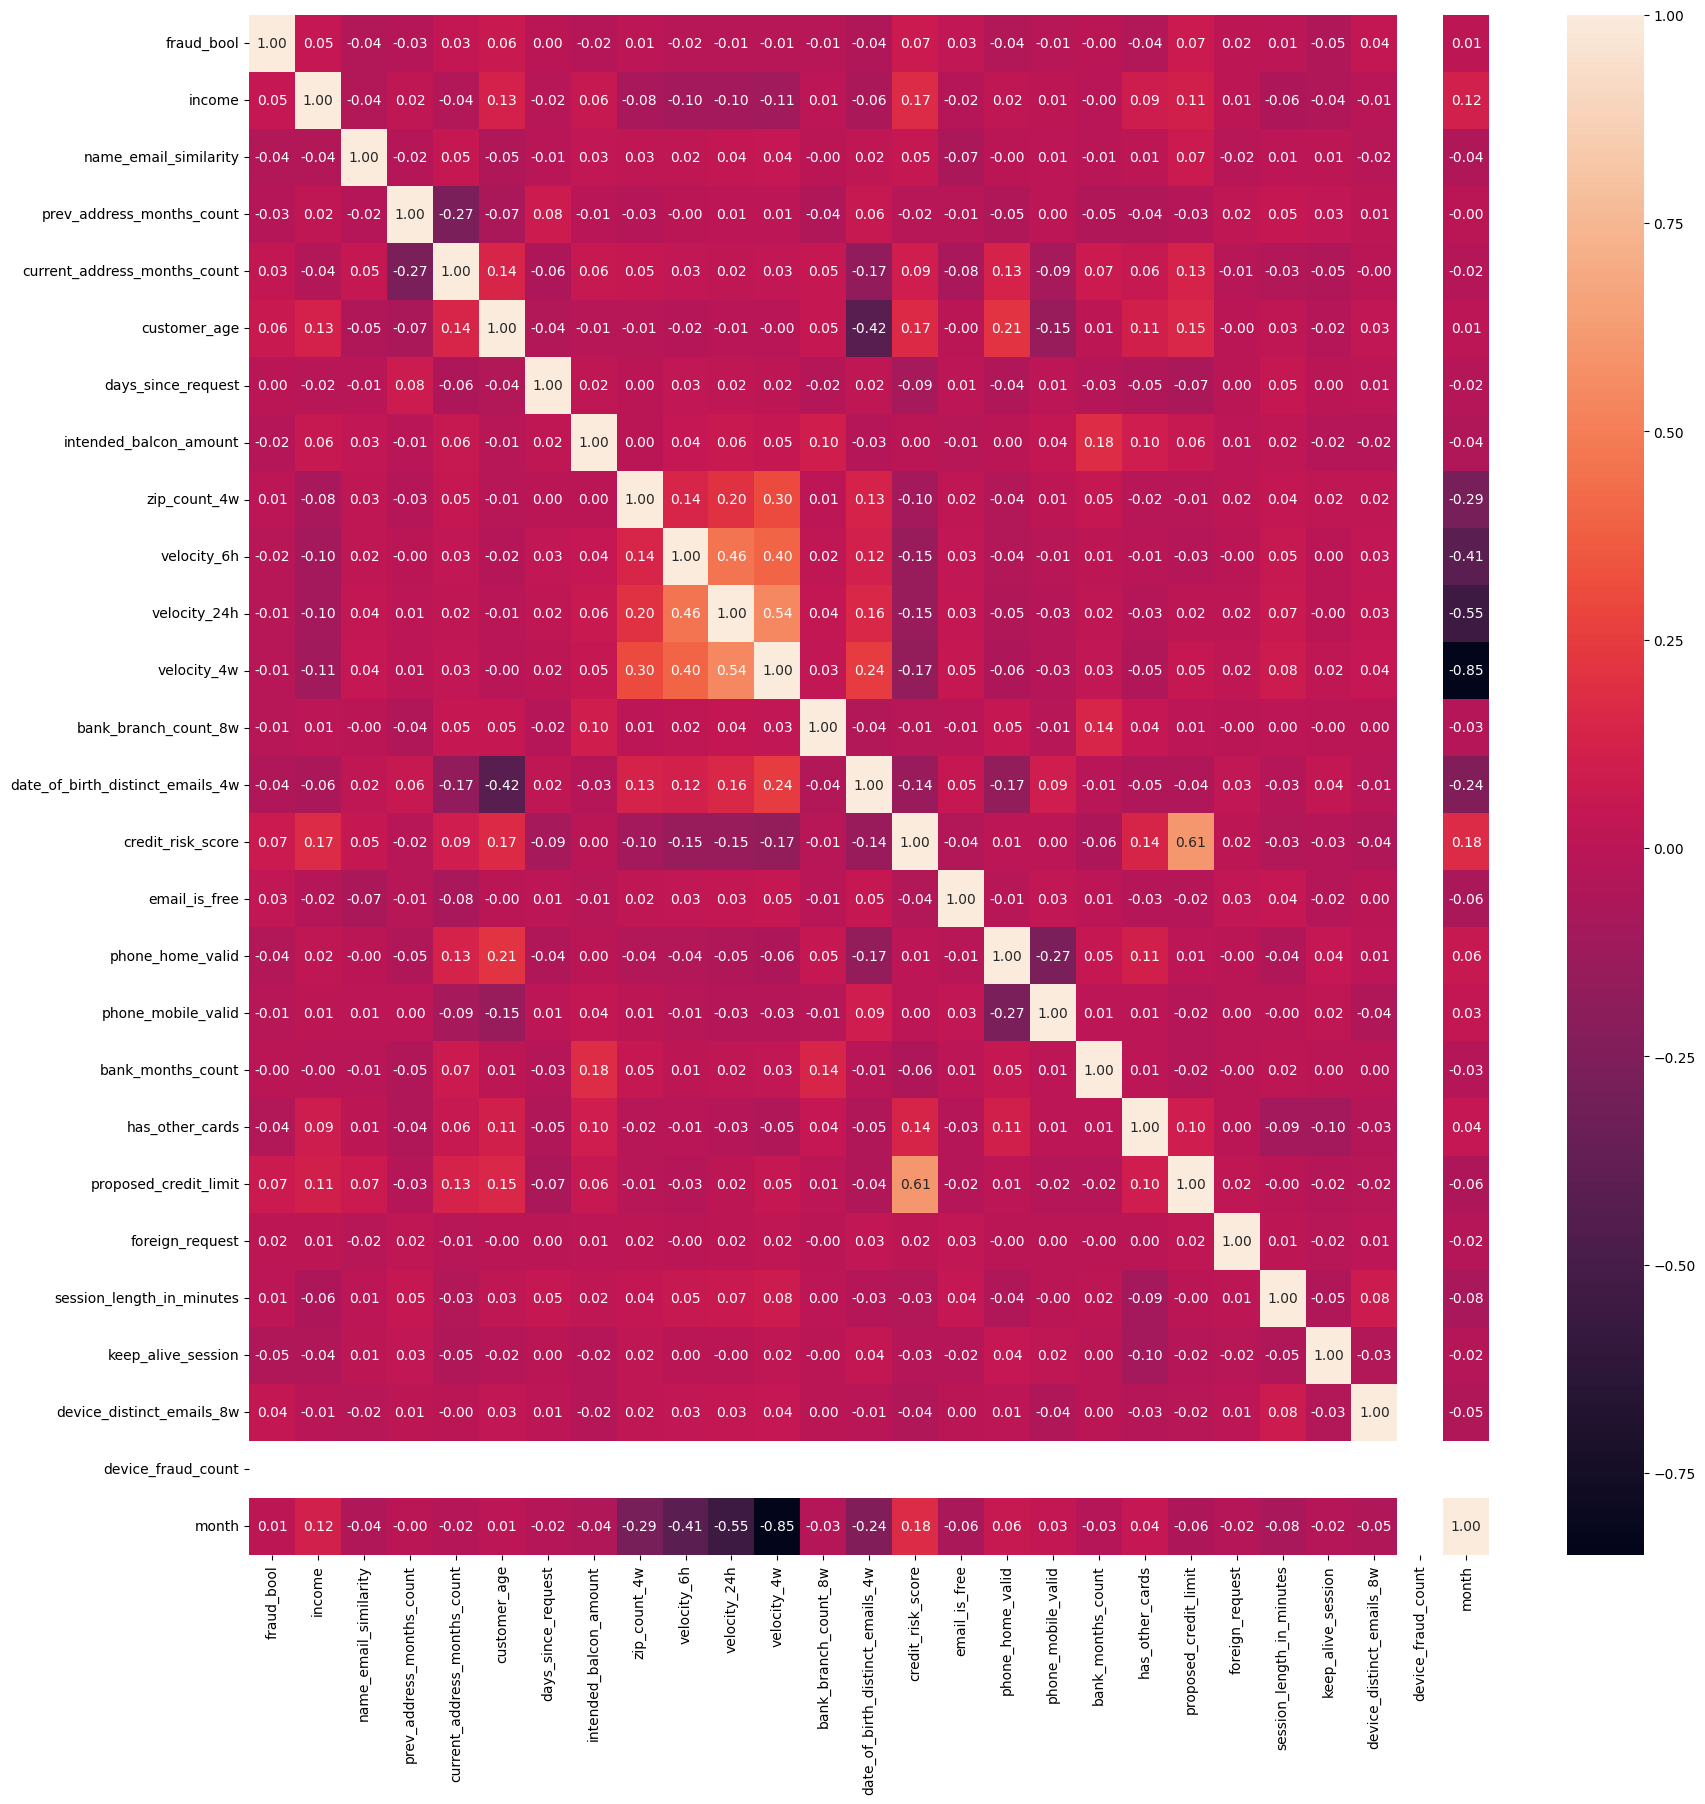

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Set the figure size (width, height) in inches, e.g., (20, 20) for a large figure
plt.figure(figsize=(20, 20))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f")

# Show the plot
# plt.savefig(f'LNM_Final/corrmatrix.png', dpi=300)
plt.show()

<Figure size 1700x1000 with 0 Axes>

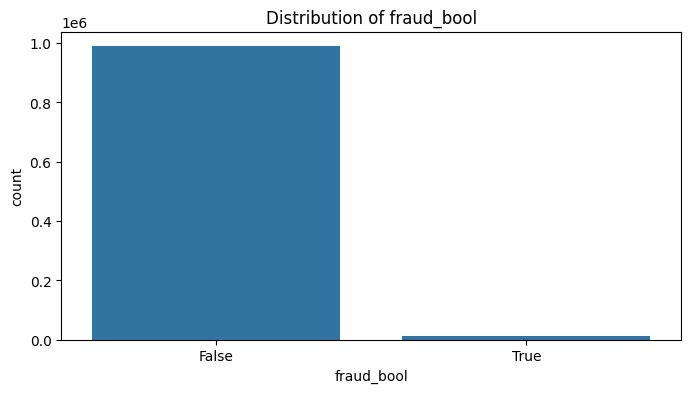

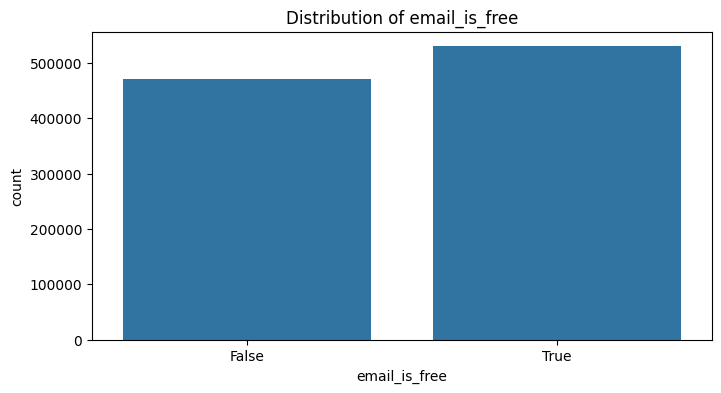

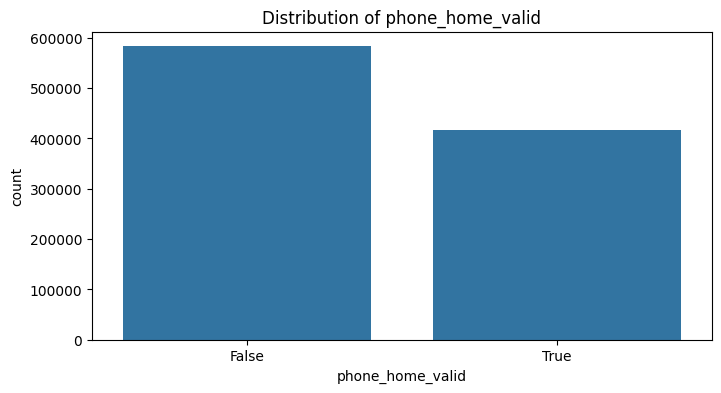

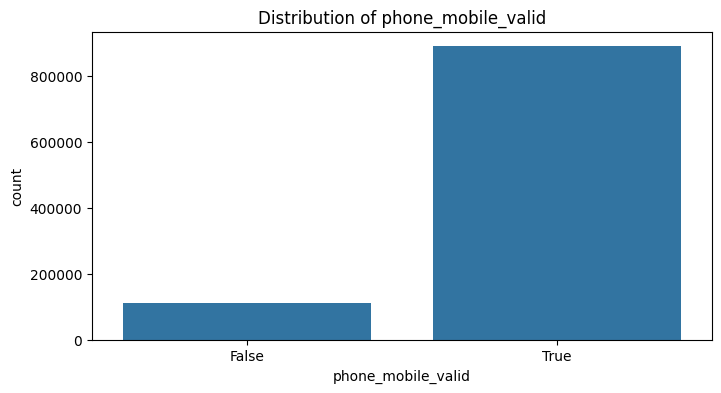

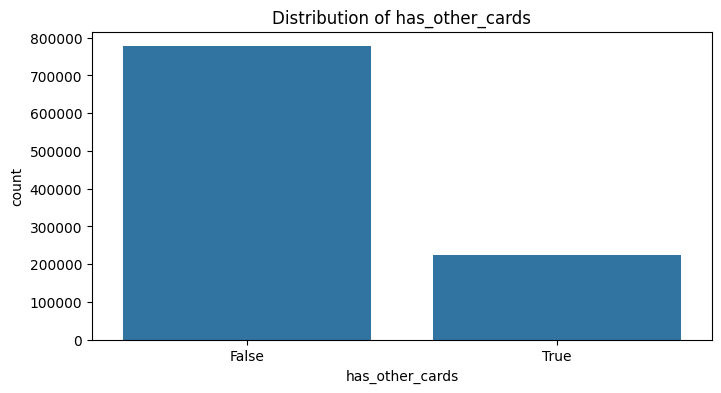

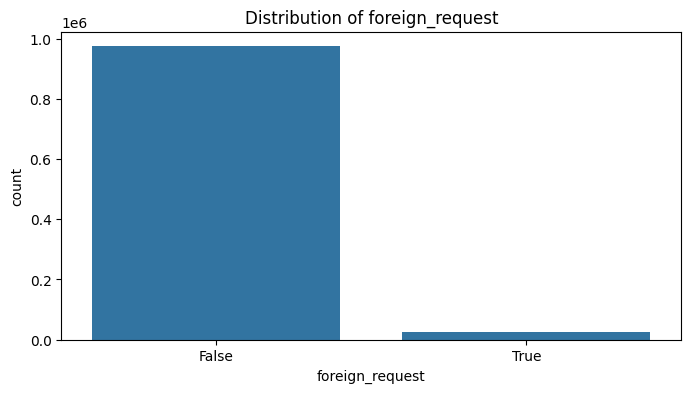

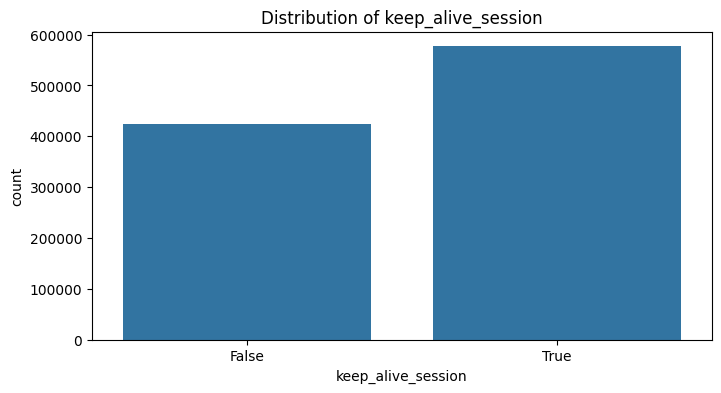

In [ ]:
plt.figure(figsize=(17,10))

# Plotting each binary column
for col in binary_columns:
    plt.figure(figsize=(8, 4))  # You can adjust the figure size as needed
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')

    # plt.savefig(f'LNM_Final/binary_{col}.png', dpi=300)
    plt.show()

<Figure size 1700x1000 with 0 Axes>

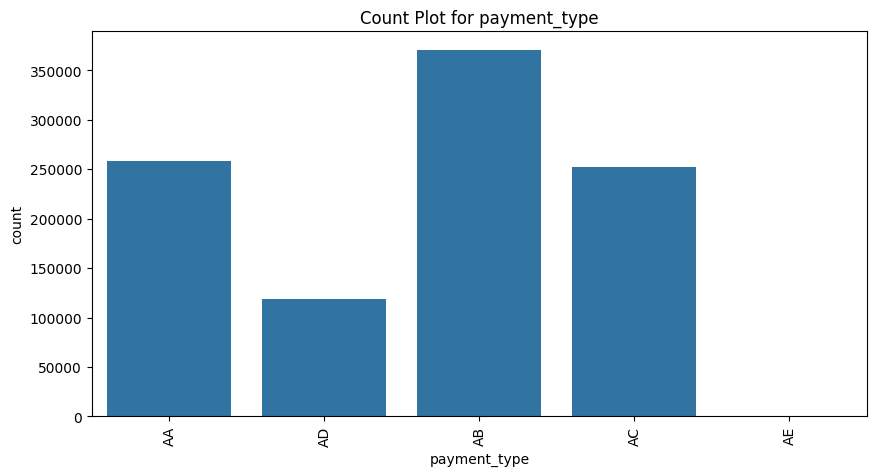

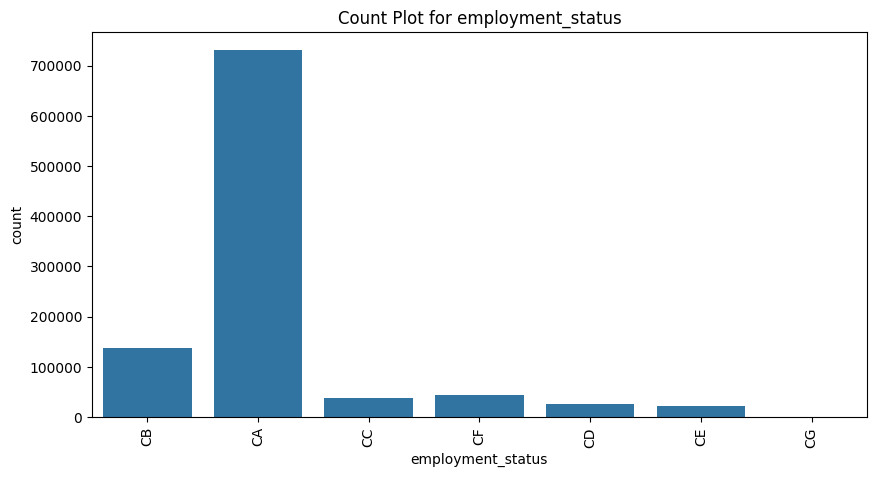

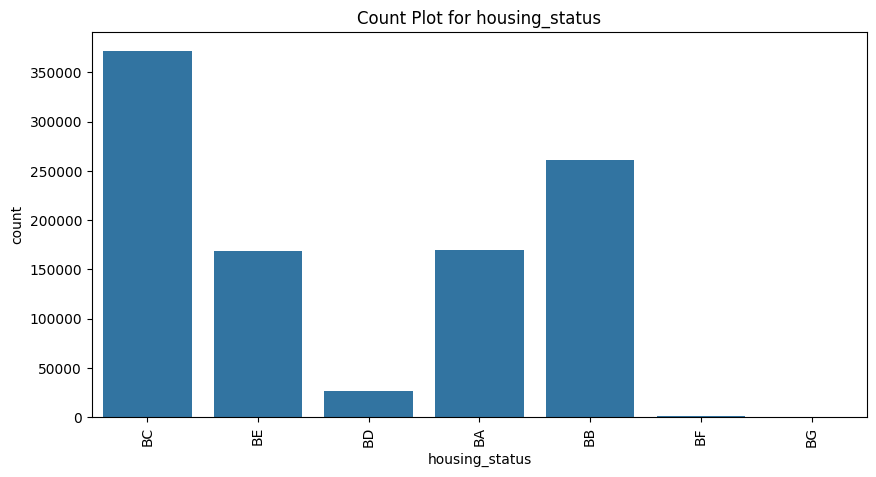

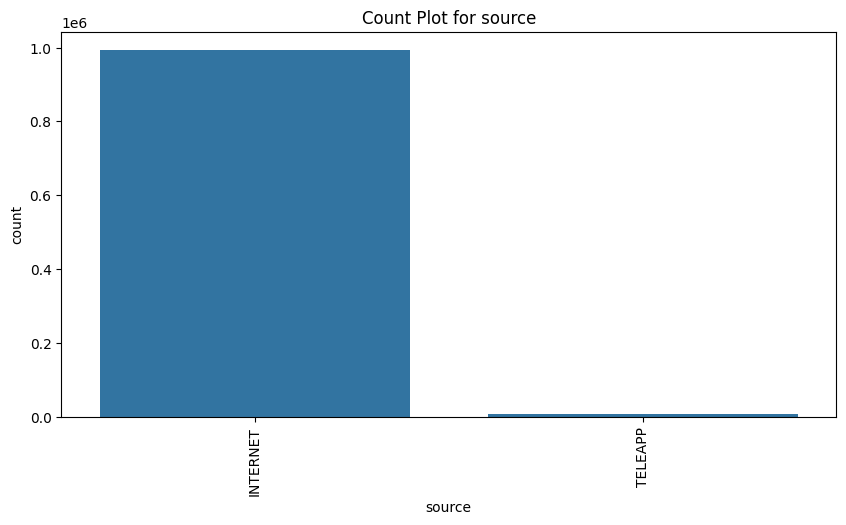

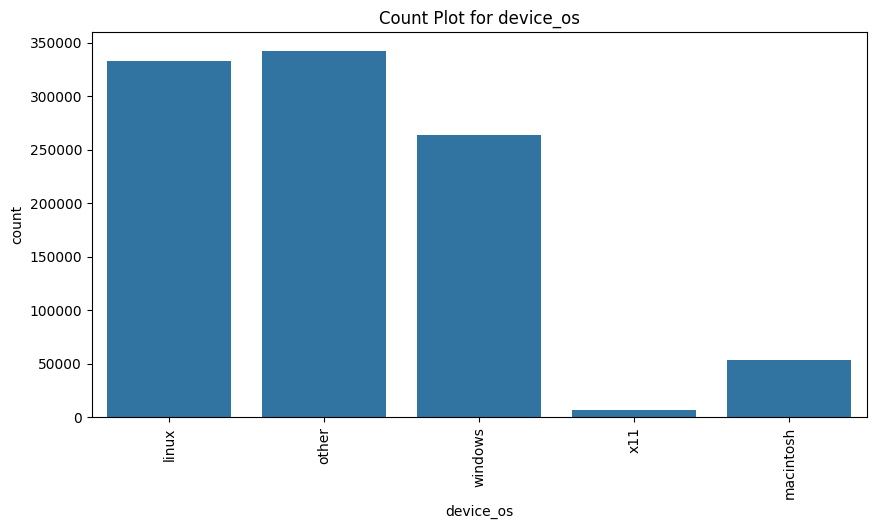

In [ ]:
plt.figure(figsize=(17,10))

# Select non-numerical (object type) columns
non_numerical_columns = df.select_dtypes(include=['object']).columns

# Create a count plot for each categorical column
for col in non_numerical_columns:
    plt.figure(figsize=(10, 5))  # Adjust the size of the plot as needed
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=90)  # Rotate labels for better readability if needed

    # plt.savefig(f'LNM_Final/object_{col}.png', dpi=300)
    plt.show()

## Steve's Initial EDA:

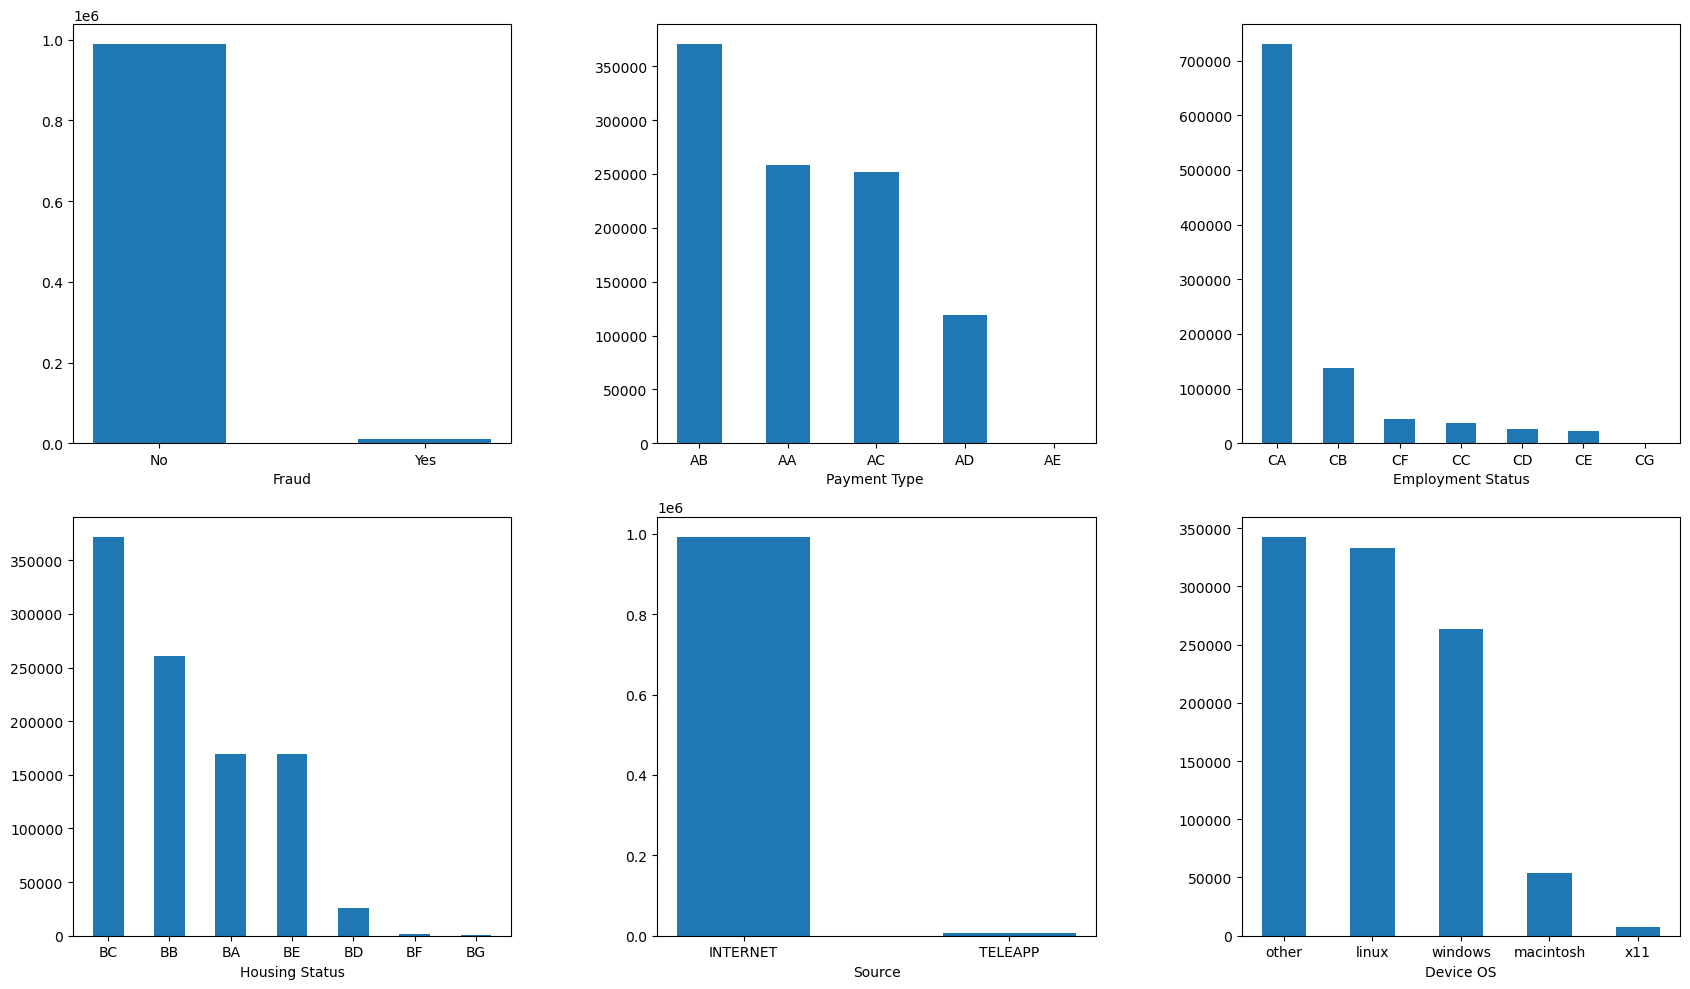

In [ ]:
# plt.figure(figsize=(17,10))

# plt.subplot(231)
# catsFraud = df['fraud_bool'].value_counts().index
# cntsFraud = df['fraud_bool'].value_counts().values
# plt.bar(catsFraud, cntsFraud, width=0.5)
# plt.xlabel('Fraud')
# plt.xticks(ticks = (0,1), labels = ('No', 'Yes'))

# plt.subplot(232)
# catsPT = df['payment_type'].value_counts().index
# cntsPT = df['payment_type'].value_counts().values
# plt.bar(catsPT, cntsPT, width=0.5)
# plt.xlabel('Payment Type ')

# plt.subplot(233)
# catsES = df['employment_status'].value_counts().index
# cntsES = df['employment_status'].value_counts().values
# plt.bar(catsES, cntsES, width=0.5)
# plt.xlabel('Employment Status')

# plt.subplot(234)
# catsHS = df['housing_status'].value_counts().index.astype(object)
# cntsHS = df['housing_status'].value_counts().values
# plt.bar(catsHS, cntsHS, width=0.5)
# plt.xlabel('Housing Status')

# plt.subplot(235)
# catsS = df['source'].value_counts().index
# cntsS = df['source'].value_counts().values
# plt.bar(catsS, cntsS, width=0.5)
# plt.xlabel('Source')

# plt.subplot(236)
# catsDOS = df['device_os'].value_counts().index
# cntsDOS = df['device_os'].value_counts().values
# plt.bar(catsDOS, cntsDOS, width=0.5)
# plt.xlabel('Device OS')

# plt.tight_layout(w_pad=6);

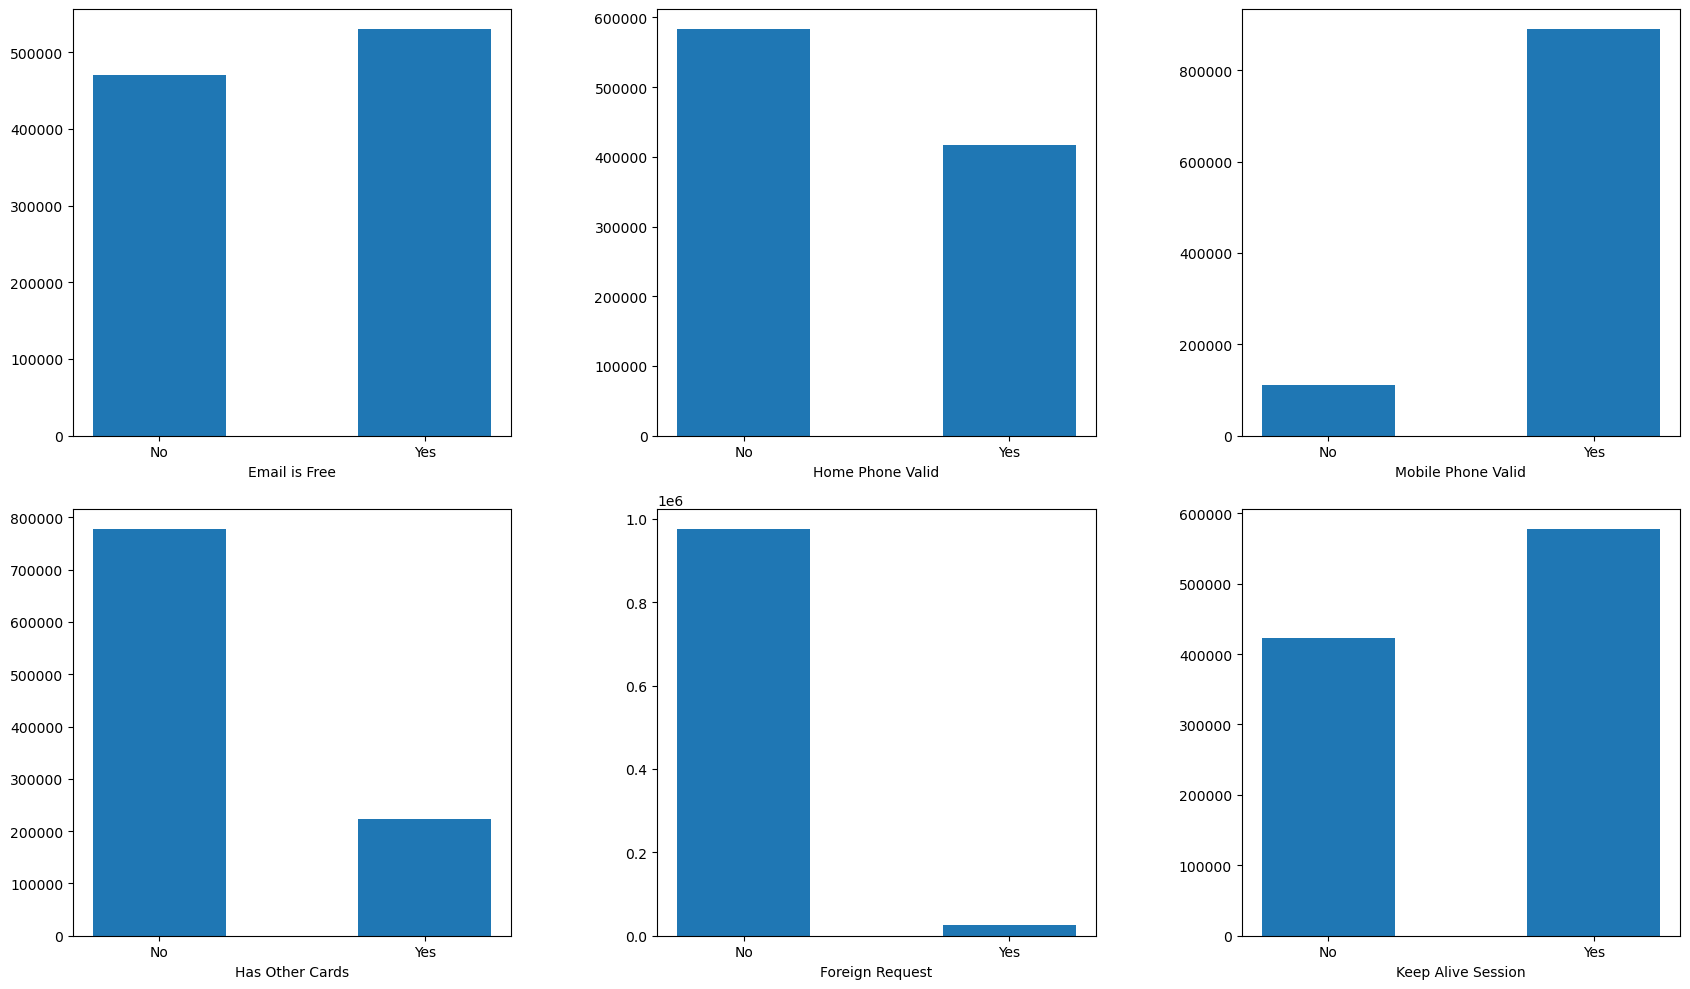

In [ ]:
# plt.figure(figsize=(17,10))

# plt.subplot(231)
# catsEF = df['email_is_free'].value_counts().index
# cntsEF = df['email_is_free'].value_counts().values
# plt.bar(catsEF, cntsEF, width=0.5)
# plt.xlabel('Email is Free')
# plt.xticks(ticks = (0,1), labels = ('No', 'Yes'))

# plt.subplot(232)
# catsHP = df['phone_home_valid'].value_counts().index
# cntsHP = df['phone_home_valid'].value_counts().values
# plt.bar(catsHP, cntsHP, width=0.5)
# plt.xlabel('Home Phone Valid')
# plt.xticks(ticks = (0,1), labels = ('No', 'Yes'))

# plt.subplot(233)
# catsMP = df['phone_mobile_valid'].value_counts().index
# cntsMP = df['phone_mobile_valid'].value_counts().values
# plt.bar(catsMP, cntsMP, width=0.5)
# plt.xlabel('Mobile Phone Valid')
# plt.xticks(ticks = (0,1), labels = ('No', 'Yes'))

# plt.subplot(234)
# catsOC = df['has_other_cards'].value_counts().index.astype(object)
# cntsOC = df['has_other_cards'].value_counts().values
# plt.bar(catsOC, cntsOC, width=0.5)
# plt.xlabel('Has Other Cards')
# plt.xticks(ticks = (0,1), labels = ('No', 'Yes'))

# plt.subplot(235)
# catsFR = df['foreign_request'].value_counts().index
# cntsFR = df['foreign_request'].value_counts().values
# plt.bar(catsFR, cntsFR, width=0.5)
# plt.xlabel('Foreign Request')
# plt.xticks(ticks = (0,1), labels = ('No', 'Yes'))

# plt.subplot(236)
# catsKAS = df['keep_alive_session'].value_counts().index
# cntsKAS = df['keep_alive_session'].value_counts().values
# plt.bar(catsKAS, cntsKAS, width=0.5)
# plt.xlabel('Keep Alive Session')
# plt.xticks(ticks = (0,1), labels = ('No', 'Yes'))

# plt.tight_layout(w_pad=6);

# Variable Selection and Preprocessing:

In [ ]:
df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

In [ ]:
# Choosing the appropriate variables

# var_cols = ['income', 'name_email_similarity',
#        'prev_address_months_count', 'current_address_months_count',
#        'customer_age', 'days_since_request', 'intended_balcon_amount',
#        'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
#        'velocity_4w', 'bank_branch_count_8w',
#        'date_of_birth_distinct_emails_4w', 'employment_status',
#        'credit_risk_score', 'email_is_free', 'housing_status',
#        'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
#        'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
#        'session_length_in_minutes', 'device_os', 'keep_alive_session',
#        'device_distinct_emails_8w', 'device_fraud_count', 'month']

var_cols = ['income','date_of_birth_distinct_emails_4w',
       'credit_risk_score', 'proposed_credit_limit']

In [ ]:
# Splitting Train/Test

In [ ]:
# Separate the features and the target variable
X = df[var_cols]
# X = df.drop('fraud_bool', axis=1)  # Replace with your actual target column name
y = df['fraud_bool']  # Replace with your actual target column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create transformers for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply the preprocessing pipeline to the training data
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

## Data Imbalance: Random Undersampling, SMOTE, and SMOTE-ENN:
* This will need to be integrated into the cell above, but I wanted to talk with the team before I did that. Now that I am thinking about it, these can probably all be applied with the pipeline function (as used in teh SVM model below). - SV

In [ ]:
# Prepare features and labels for model training
X = df.drop(['fraud_bool'], axis=1).to_numpy()  # Features
y = df['fraud_bool'].to_numpy()  # Encoded labels

# Split into training and testing sets:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Create SMOTE-balanced train and test sets:
smt = imblearn.over_sampling.SMOTE(sampling_strategy='minority', random_state=42)
smt_train_x, smt_train_y = smt.fit_resample(train_x, train_y)

# Create RU-balanced train and test sets:
rus = imblearn.under_sampling.RandomUnderSampler(sampling_strategy='majority', random_state=42, replacement=False)
rus_train_x, rus_train_y = rus.fit_resample(train_x, train_y)

# SMOTE-ENN:
# First define ENN object - here we may want to experiment with the parameters sampling_strategy ('all' vs 'auto') and n_neighbors (3 is default):
our_enn = imblearn.under_sampling.EditedNearestNeighbours(sampling_strategy = 'auto' n_neighbors = 3)

# Create SMOTE-ENN balanced train and test sets:
senn = imblearn.combine.SMOTEENN(sampling_strategy='minority', random_state=42, enn = our_enn)
senn_train_x, senn_train_y = senn.fit_resample(train_x, train_y)



# Apply Scaler as needed for various models:
scaler = sklearn.preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler_smt = sklearn.preprocessing.StandardScaler()
X_train_smt_scaled = scaler_smt.fit_transform(X_train_smt)
X_test_smt_scaled = scaler.smt.transform(X_test_smt)

scaler_rus = sklearn.preprocessing.StandardScaler()
X_train_rus_scaled = scaler_rus.fit_transform(X_train_rus)
X_test_rus_scaled = scaler.rus.transform(X_test_rus)

scaler_senn = sklearn.preprocessing.StandardScaler()
X_train_senn_scaled = scaler_enn.fit_transform(X_train_enn)
X_test_senn_scaled = scaler.enn.transform(X_test_enn)

# Modeling

In [ ]:
# Logistic Regression

In [ ]:
# Create a logistic regression model
logistic_model = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', LogisticRegression(random_state=42))])

# Initialize and train the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence warning appears
logistic_model.fit(X_train_prepared, y_train)

# Make predictions and evaluate the model
y_pred = logistic_model.predict(X_test_prepared)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a dataframe with the metrics
df_metrics = pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Accuracy': [accuracy],
    'Recall': [recall],
    'Precision': [precision],
    'F1 Score': [f1]
})

print(df_metrics)

Accuracy: 0.989455
                 Model  Accuracy  Recall  Precision  F1 Score
0  Logistic Regression  0.989455     0.0        0.0       0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Decision Tree

In [ ]:
# Creating the Decision Tree classifier and fitting it to the training set
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(X_train_prepared, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test_prepared)

# Generating the accuracy score and classification report
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Assuming df_metrics is already defined and is a DataFrame
# Create a new dataframe with the metrics
new_entry = pd.DataFrame({
    'Model': ['Decision Tree'],
    'Accuracy': [accuracy],
    'Recall': [recall],
    'Precision': [precision],
    'F1 Score': [f1]
})

# Assuming df_metrics is already defined and new_entry is prepared
df_metrics = pd.concat([df_metrics, new_entry], ignore_index=True)

print(df_metrics)


0.98687
              precision    recall  f1-score   support

       False       0.99      1.00      0.99    197891
        True       0.07      0.02      0.03      2109

    accuracy                           0.99    200000
   macro avg       0.53      0.51      0.51    200000
weighted avg       0.98      0.99      0.98    200000

                 Model  Accuracy    Recall  Precision  F1 Score
0  Logistic Regression  0.989455  0.000000   0.000000  0.000000
1        Decision Tree  0.986870  0.019915   0.069884  0.030996


In [ ]:
# Random Forest

In [ ]:
# Creating the Random Forest classifier and fitting it to the training set
classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)
classifier.fit(X_train_prepared, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test_prepared)

# Generating the accuracy score and classification report
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Assuming df_metrics is already defined and is a DataFrame
# Create a new dataframe with the metrics
new_entry = pd.DataFrame({
    'Model': ['Random Forest'],
    'Accuracy': [accuracy],
    'Recall': [recall],
    'Precision': [precision],
    'F1 Score': [f1]
})

# Assuming df_metrics is already defined and new_entry is prepared
df_metrics = pd.concat([df_metrics, new_entry], ignore_index=True)

print(df_metrics)


0.98805
              precision    recall  f1-score   support

       False       0.99      1.00      0.99    197891
        True       0.08      0.01      0.02      2109

    accuracy                           0.99    200000
   macro avg       0.53      0.51      0.51    200000
weighted avg       0.98      0.99      0.98    200000

                 Model  Accuracy    Recall  Precision  F1 Score
0  Logistic Regression  0.989455  0.000000   0.000000  0.000000
1        Decision Tree  0.986870  0.019915   0.069884  0.030996
2        Random Forest  0.988050  0.011854   0.075529  0.020492


In [ ]:
# Support Vector Machine (SVM)

In [ ]:


# Create an SVM model
svm_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', SVC(random_state=42))])

# Train the model
svm_model.fit(X_train_prepared, y_train)

# Predictions
y_pred = svm_model.predict(X_test_prepared)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Assuming df_metrics is already defined and is a DataFrame
# Create a new dataframe with the metrics
new_entry = pd.DataFrame({
    'Model': ['SVM'],
    'Accuracy': [accuracy],
    'Recall': [recall],
    'Precision': [precision],
    'F1 Score': [f1]
})

# Assuming df_metrics is already defined and new_entry is prepared
df_metrics = pd.concat([df_metrics, new_entry], ignore_index=True)

print(df_metrics)


                 Model  Accuracy    Recall  Precision  F1 Score
0  Logistic Regression  0.989455  0.000000   0.000000  0.000000
1        Decision Tree  0.986870  0.019915   0.069884  0.030996
2        Random Forest  0.988050  0.011854   0.075529  0.020492
3                  SVM  0.989455  0.000000   0.000000  0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Neural Network

In [ ]:
# Create a neural network model
nn_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', MLPClassifier(random_state=42))])

# Train the model
nn_model.fit(X_train_prepared, y_train)

# Predictions
y_pred = nn_model.predict(X_test_prepared)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Assuming df_metrics is already defined and is a DataFrame
# Create a new dataframe with the metrics
new_entry = pd.DataFrame({
    'Model': ['NN'],
    'Accuracy': [accuracy],
    'Recall': [recall],
    'Precision': [precision],
    'F1 Score': [f1]
})

# Assuming df_metrics is already defined and new_entry is prepared
df_metrics = pd.concat([df_metrics, new_entry], ignore_index=True)

print(df_metrics)

                 Model  Accuracy    Recall  Precision  F1 Score
0  Logistic Regression  0.989455  0.000000   0.000000  0.000000
1        Decision Tree  0.986870  0.019915   0.069884  0.030996
2        Random Forest  0.988050  0.011854   0.075529  0.020492
3                  SVM  0.989455  0.000000   0.000000  0.000000
4                   NN  0.989455  0.003319   0.500000  0.006594


In [ ]:
# K-Nearest Neighbors:

# Determine optimal k based on accuracy and recall:
k = [1, 3, 5, 7, 9]
acc = []
rec = []
for i in k:
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train_scaled, y_train)
    knn_predictions = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, knn_predictions)
    #rec = recall_score(y_test, knn_predictions,  average = 'weighted')
    rec = recall_score(y_test, knn_predictions,  average = 'weighted')
    acc.append(accuracy)
    rec.append(rec)

In [ ]:
# Determine Where Accuracy Peaks Using Table:
scree_data = pd.DataFrame()
scree_data['k'] = k[1:]
scree_data['accuracy'] = acc[1:]
scree_data['recall'] = rec[1:]
print(scree_data)

In [ ]:
# Final K-Nearest Neighbors Model:

knn = KNeighborsClassifier(n_neighbors = 'determine k above').fit(X_train_scaled, y_train)
knn_predictions = knn.predict(X_test_scaled)

# accuracy, recall, auc on X_test:
accuracy = accuracy_score(y_test, knn_predictions)
auc = roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:,1], )
rec = recall_score(y_test, knn_predictions)
f1 = f1_score(y_test, knn_predictions)
precision = precision_score(y_test, knn_predictions)

print('Out of Sample Accuracy = %0.2f' % accuracy)
print()
cm = confusion_matrix(y_test, knn_predictions)
MsTxt = np.char.array([['TN','FP'], ['FN','TP']]) + '='
MsTxt = MsTxt + cm.astype('str') + '; ' + (cm/cm.sum() * 100).round(1).astype('str') + '%'
_, ax = plt.subplots(figsize=(10, 2))
aLbl = np.array(['0=Benign', '1=Malware'])
dfCM = pd.DataFrame(cm, index=aLbl, columns=aLbl)
ax = sns.heatmap(dfCM, annot=MsTxt, cbar=False, cmap='coolwarm', fmt='', ax=ax)
ax.set_title('Confusion Matrix: counts and % of total count')
ax.set(xlabel='Predicted labels', ylabel='True labels')
sns.set(font_scale=1.2);

# Explainable AI:

In [ ]:
# Explainable AI (XAI)
# To implement XAI, you could use SHAP (SHapley Additive exPlanations) to explain the output of your models.